# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [9]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [8]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

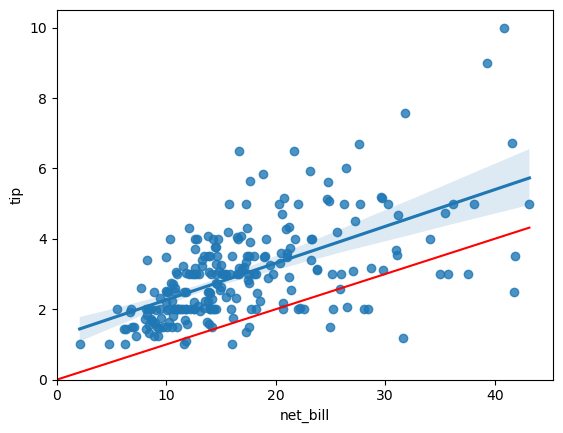

In [7]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

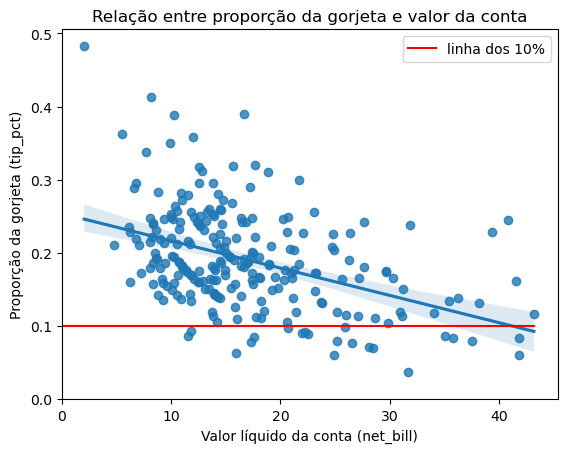

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Supondo que o DataFrame 'tips' já tenha as colunas 'tip', 'net_bill' e 'tip_pct'

# Gráfico de dispersão com linha de regressão
sns.regplot(y='tip_pct', x='net_bill', data=tips[tips['tip_pct']<.5])

# Linha dos 10%
x = np.linspace(0, tips['net_bill'].max(), 100)
y = 0.1 * np.ones_like(x)  # linha horizontal no 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Ajustes estéticos
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel('Valor líquido da conta (net_bill)')
plt.ylabel('Proporção da gorjeta (tip_pct)')
plt.legend()
plt.title('Relação entre proporção da gorjeta e valor da conta')

plt.show()

Explicação:

- sns.regplot() constrói o gráfico de dispersão e ajusta automaticamente uma reta de regressão linear.

- Limitei os dados a tip_pct < 0.5 para eliminar outliers (gorjetas acima de 50%).

- A linha vermelha (y = 0.1) representa a referência de 10%.

- O modelo ajustado agora explica como a proporção da gorjeta varia em função do valor da conta.

### 3. Comente

**Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?**

No primeiro gráfico, modelamos tip em função de net_bill. A relação é positiva: quanto maior o valor da conta, maior tende a ser o valor absoluto da gorjeta — o que faz sentido, já que clientes costumam dar gorjetas proporcionais ao gasto.

No segundo gráfico, ao modelar tip_pct (proporção da gorjeta) em função de net_bill, a tendência se inverte: observa-se uma relação negativa. Isso indica que, embora o valor da gorjeta aumente com a conta, a proporção da gorjeta tende a diminuir — ou seja, clientes que pagam contas mais altas deixam gorjetas relativamente menores.

Os dois modelos descrevem aspectos complementares do mesmo fenômeno.
O primeiro mostra o crescimento absoluto das gorjetas, enquanto o segundo revela uma redução relativa na generosidade conforme o valor da conta aumenta.
Assim, não podemos comparar diretamente os coeficientes dos dois ajustes, pois as variáveis dependentes (uma em valor absoluto, outra em proporção) estão em escalas diferentes.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [10]:
import statsmodels.api as sm
import numpy as np

# 1. Ajuste do modelo de tip_pct ~ net_bill
df = tips[tips['tip_pct'] < 0.5].copy()

X = sm.add_constant(df['net_bill'])
y = df['tip_pct']
reg = sm.OLS(y, X).fit()

# 2. Valores preditos
df['pred_tip_pct'] = reg.fittedvalues
df['pred_tip'] = df['pred_tip_pct'] * df['net_bill']

# 3. R² do modelo para tip
SSE = np.sum((df['tip'] - df['pred_tip'])**2)
SST = np.sum((df['tip'] - df['tip'].mean())**2)
R2_tip = 1 - SSE/SST

# 4. Modelo original do item 1: tip ~ net_bill
X1 = sm.add_constant(tips['net_bill'])
y1 = tips['tip']
reg_tip = sm.OLS(y1, X1).fit()

# 5. Comparação dos R²
print("R² do modelo em termos de tip (via tip_pct):", R2_tip)
print("R² do modelo direto tip ~ net_bill:", reg_tip.rsquared)

R² do modelo em termos de tip (via tip_pct): 0.3503553432251354
R² do modelo direto tip ~ net_bill: 0.3325407312323707


Ambos os modelos têm poder explicativo parecido.
O modelo baseado em tip_pct explica levemente mais a variação no valor da gorjeta, mas a diferença é mínima.
Isso indica que a mudança de escala (proporção vs valor absoluto) não altera substancialmente a capacidade de previsão da gorjeta em função do valor da conta.